In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# 加载数据
data = pd.read_csv('./combined_data.csv')

# 删除不需要的列，例如时间戳或IP地址（假设你的数据集中有这些列）
data.drop([' Timestamp'], axis=1, inplace=True)

# 类型转换，将分类标签编码
label_encoder = LabelEncoder()
data[' Label'] = label_encoder.fit_transform(data[' Label'])

# 检查并处理无穷大和非常大的数值
data.replace([np.inf, -np.inf], np.nan, inplace=True)  # 将inf替换为NaN
data.fillna(data.median(), inplace=True)  # 使用中位数填充NaN，确保之前中位数计算不包括inf

# 特征标准化
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(' Label', axis=1))  # 确保标签列不参与标准化
y = data[' Label']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("数据预处理完成，准备进行模型训练和测试。")


数据预处理完成，准备进行模型训练和测试。


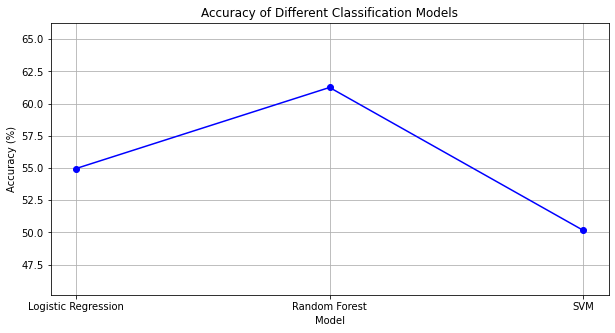

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# 初始化模型
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
svm = SVC()

# 训练逻辑回归模型
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg) * 100

# 训练随机森林模型
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf) * 100

# 训练支持向量机模型
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm) * 100

# # 训练XGBoost模型
# xgb.fit(X_train, y_train)
# y_pred_xgb = xgb.predict(X_test)
# xgb_accuracy = accuracy_score(y_test, y_pred_xgb) * 100

# 模型名称和准确度列表
models = ['Logistic Regression', 'Random Forest', 'SVM']  #, 'XGBoost'
accuracies = [logreg_accuracy, rf_accuracy, svm_accuracy]  #, xgb_accuracy

# 绘制折线图
plt.figure(figsize=(10, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of Different Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.xticks(models)
plt.ylim([min(accuracies) - 5, max(accuracies) + 5])
plt.show()


In [4]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# import numpy as np

# # 初始化XGBoost模型
# xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')

# # 训练模型
# eval_set = [(X_train, y_train), (X_test, y_test)]
# xgb.fit(X_train, y_train, eval_set=eval_set, verbose=10, early_stopping_rounds=10)

# # 获取每10轮的测试集结果
# results = xgb.evals_result()
# epochs = len(results['validation_1']['mlogloss'])
# x_axis = range(0, epochs, 10)  # 每10轮作为一个检查点

# # 绘制mlogloss的变化
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_1']['mlogloss'][0::10], label='Test')
# ax.legend()
# plt.ylabel('Log Loss')
# plt.title('XGBoost Log Loss')
# plt.show()

# # 打印最后的准确率
# y_pred = xgb.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Final Accuracy: {accuracy:.2f}%")


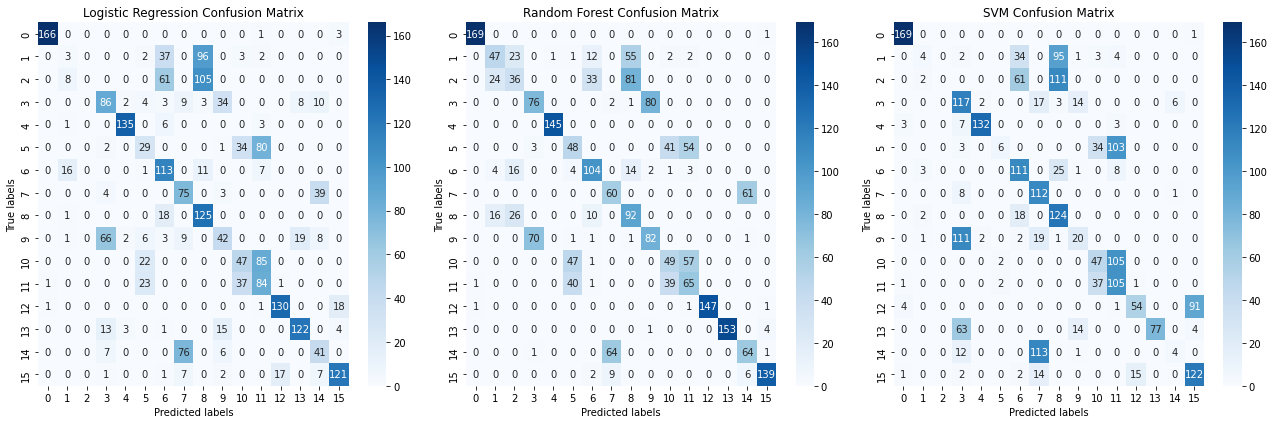

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 初始化模型
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
svm = SVC()

# 训练模型
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# 预测结果
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# 混淆矩阵
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# 绘制混淆矩阵的热图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_rf, annot=True, fmt="d", ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_svm, annot=True, fmt="d", ax=axes[2], cmap='Blues')
axes[2].set_title('SVM Confusion Matrix')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 初始化模型
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
svm = SVC()

# 训练模型
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# 预测结果
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# 混淆矩阵
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# 绘制混淆矩阵的热图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_rf, annot=True, fmt="d", ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_svm, annot=True, fmt="d", ax=axes[2], cmap='Blues')
axes[2].set_title('SVM Confusion Matrix')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()
